# GDrive and libraries

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/[2023-2024] AN2DL/Project 1

Mounted at /gdrive
/gdrive/My Drive/[2023-2024] AN2DL/Project 1


In [2]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import pandas as pd

import logging

import random
random.seed(seed)

In [3]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

2.14.0


In [4]:
# Import other libraries
#from tensorflow.keras.applications.efficientnet import preprocess_input
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

# Load and inspect data

In [ ]:
#Unzip dataset
unzip = True

# Unzip the 'animals.zip' file if the 'unzip' flag is True
if unzip:
    !unzip public_data.zip


Archive:  public_data.zip
  inflating: public_data.npz         


In [5]:
#Load dataset
plants = np.load('public_data.npz', allow_pickle=True)
data = plants['data']
labels = plants['labels']
images_normalized = data.astype(float) / 255.0

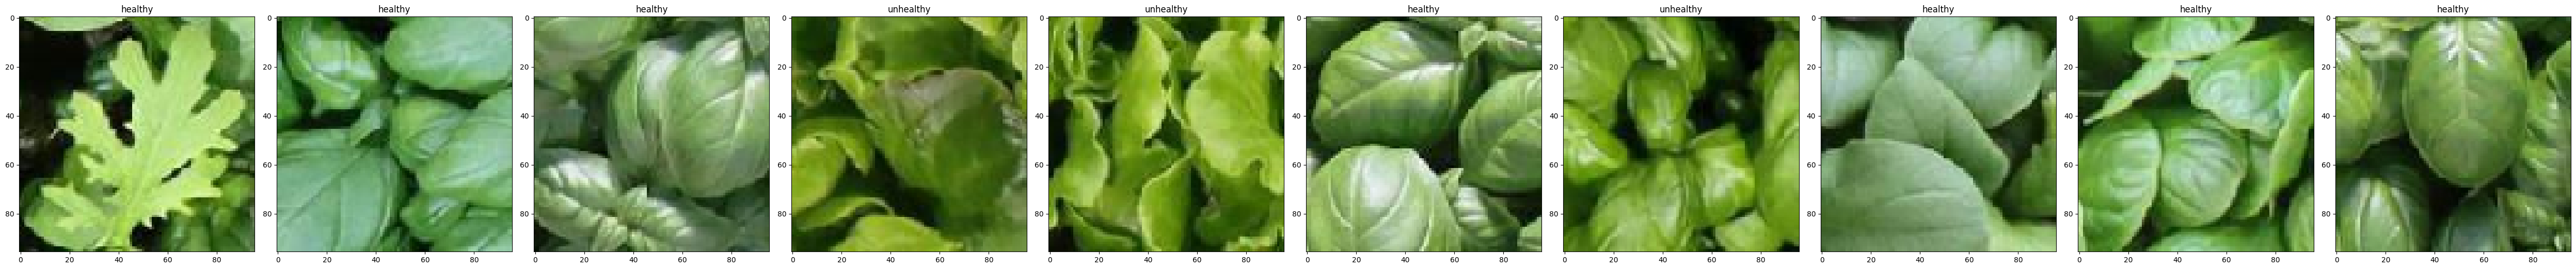

In [ ]:
#Plot plants images
num_img = 10
fig, axes = plt.subplots(1, num_img, figsize=(50, 50))

# Iterate through the selected number of images
for i in range(num_img):
    ax = axes[i % num_img]
    ax.imshow(images_normalized[i])
    ax.set_title(f'{labels[i]}')  # Show the corresponding digit label

# Adjust layout and display the images
plt.tight_layout()
plt.show()

In [6]:
print('Data:' ,data.shape)
print('Labels: ',labels.shape)

Data: (5200, 96, 96, 3)
Labels:  (5200,)


In [7]:
print('Counting occurrences of target classes:')
print(pd.DataFrame(labels, columns=['labels'])['labels'].value_counts())

Counting occurrences of target classes:
healthy      3199
unhealthy    2001
Name: labels, dtype: int64


In [10]:
# Check for duplicates
unique_data, unique_indices = np.unique(data, axis=0, return_index=True)
is_duplicate = unique_data.shape[0] != data.shape[0]

if is_duplicate:
    print("There are duplicate images in the dataset.")
    # Get indices of duplicate images
    duplicate_indices = np.setdiff1d(np.arange(data.shape[0]), unique_indices)

    # Display duplicate images
    for index in duplicate_indices:
        duplicate_image = data[index] / 255.0  # Normalize pixel values to [0, 1]
        #plt.imshow(duplicate_image)
        #plt.title(f'Duplicate Image - Index: {index}')
        #plt.show()
else:
    print("No duplicate images found in the dataset.")


There are duplicate images in the dataset.


# Manage duplicate images

In [11]:
print(len(duplicate_indices))

348


In [12]:
# Identify the outlier image index
outlier_index = 95

# Find all occurrences of the outlier image
outlier_occurrences = np.where(np.all(data == data[outlier_index], axis=(1, 2, 3)))[0]

# Remove outlier occurrences from data and labels
data = np.delete(data, outlier_occurrences, axis=0)
labels = np.delete(labels, outlier_occurrences, axis=0)

print(f"Removed {len(outlier_occurrences)} occurrences of the outlier image at index {outlier_index}.")

Removed 98 occurrences of the outlier image at index 95.


In [14]:
# Check for duplicates
unique_data, unique_indices = np.unique(data, axis=0, return_index=True)
is_duplicate = unique_data.shape[0] != data.shape[0]

if is_duplicate:
    print("There are duplicate images in the dataset.")
    # Get indices of duplicate images
    duplicate_indices = np.setdiff1d(np.arange(data.shape[0]), unique_indices)

    # Display duplicate images
    for index in duplicate_indices:
        duplicate_image = data[index] / 255.0  # Normalize pixel values to [0, 1]
        #plt.imshow(duplicate_image)
        #plt.title(f'Duplicate Image - Index: {index}')
        #plt.show()
else:
    print("No duplicate images found in the dataset.")

There are duplicate images in the dataset.


In [15]:
# Identify the outlier image index
outlier_index = 406

# Find all occurrences of the outlier image
outlier_occurrences = np.where(np.all(data == data[outlier_index], axis=(1, 2, 3)))[0]

# Remove outlier occurrences from data and labels
data = np.delete(data, outlier_occurrences, axis=0)
labels = np.delete(labels, outlier_occurrences, axis=0)

print(f"Removed {len(outlier_occurrences)} occurrences of the outlier image at index {outlier_index}.")

Removed 98 occurrences of the outlier image at index 406.


In [ ]:
print(len(duplicate_indices))

251


In [16]:
print('Data:' ,data.shape)
print('Labels: ',labels.shape)

Data: (5004, 96, 96, 3)
Labels:  (5004,)


# Train, val and test division

In [17]:
print(labels)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
print(labels)

['healthy' 'healthy' 'healthy' ... 'healthy' 'healthy' 'healthy']
[0 0 0 ... 0 0 0]


In [18]:
X_train_val, X_test, y_train_val, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels)

In [19]:
print('Counting occurrences of target classes:')
print(pd.DataFrame(y_train_val, columns=['labels'])['labels'].value_counts())

Counting occurrences of target classes:
0    2481
1    1522
Name: labels, dtype: int64


In [20]:
# Normalize data to the range [0, 1]
#X_train_val = (X_train_val / 255).astype('float32')
#X_test = (X_test / 255).astype('float32')

# Convert labels to categorical format using one-hot encoding
y_train_val = tfk.utils.to_categorical(y_train_val)
y_test = tfk.utils.to_categorical(y_test)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, stratify=y_train_val)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(3202, 96, 96, 3)
(801, 96, 96, 3)
(3202, 2)
(801, 2)


In [22]:
# Define key model parameters
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]
batch_size = 32
epochs = 200

print("Epochs:", epochs)
print("Batch Size:", batch_size)
print("Input Shape:", input_shape)
print("Output Shape:", output_shape)

Epochs: 200
Batch Size: 32
Input Shape: (96, 96, 3)
Output Shape: 2


In [ ]:
#DO NOT RUN THIS CODE FOR AUGMENTATION
#data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='reflect'
)
augmentation_factor = 3

# Initialize empty lists to store augmented data
augmented_images = []
augmented_labels = []

# Perform data augmentation and append augmented data to the lists
for i in range(augmentation_factor):
    for x_batch, y_batch in datagen.flow(X_train, y_train, batch_size=len(X_train), shuffle=False):
        augmented_images.append(x_batch)
        augmented_labels.append(y_batch)
        break  # Exit the loop after one batch to avoid an infinite loop

# Concatenate the augmented data into NumPy arrays
augmented_images = np.concatenate(augmented_images, axis=0)
augmented_labels = np.concatenate(augmented_labels, axis=0)

# Verify the shape of augmented data
print("Shape of augmented images:", augmented_images.shape)
print("Shape of augmented labels:", augmented_labels.shape)

Shape of augmented images: (9984, 96, 96, 3)
Shape of augmented labels: (9984, 2)


In [23]:
#class weights
total_samples = len(X_train)
num_class_0 = 2481
num_class_1 = 1522

weight_for_class_0 = total_samples / (2 * num_class_0)
weight_for_class_1 = total_samples / (2 * num_class_1)

class_weight = {0: weight_for_class_0, 1: weight_for_class_1}

# ConvNextLarge

In [24]:
convnextlarge = tfk.applications.ConvNeXtLarge(
    include_top=False,
    weights="imagenet",
    input_shape=(96,96,3)
)
convnextlarge.summary()

785596384/785596384 [==============================] - 11s 0us/step
Model: "convnext_large"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 convnext_large_prestem_nor  (None, 96, 96, 3)            0         ['input_1[0][0]']             
 malization (Normalization)                                                                       
                                                                                                  
 convnext_large_stem (Seque  (None, 24, 24, 192)          9792      ['convnext_large_prestem_norma
 ntial)                                                             lization[0][0]']              
                 

In [29]:
from keras.src.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D
# Use the supernet as feature extractor, i.e. freeze all its weigths
convnextlarge.trainable = False

preprocessing = tf.keras.Sequential([
        tfkl.RandomFlip("horizontal"),
        tfkl.RandomFlip("vertical"),
        tfkl.RandomRotation(0.2),
    ], name='preprocessing')

inputs = tfk.Input(shape=(96, 96, 3))

preprocessing = preprocessing(inputs)

x = convnextlarge(preprocessing)

x = tfkl.GlobalAveragePooling2D()(x)

x = tfkl.Dropout(0.5, seed=seed)(x)

x = tfkl.Dense( units=256,
                activation = 'relu',
                kernel_initializer = tfk.initializers.HeUniform(seed))(x)

x = tfkl.Dropout(0.15, seed=seed)(x)

# Add a Dense layer with 2 units and sigmoid activation as the classifier
outputs = tfkl.Dense(2, activation='sigmoid')(x)

# Create a Model connecting input and output
convnextlarge_model = tfk.Model(inputs=inputs, outputs=outputs, name='model')

# Display model summary
convnextlarge_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 preprocessing (Sequential)  (None, 96, 96, 3)         0         
                                                                 
 convnext_large (Functional  (None, 3, 3, 1536)        196230336 
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout_2 (Dropout)         (None, 1536)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               393472

In [30]:
early_stopping = tfk.callbacks.EarlyStopping(monitor='val_accuracy', patience=12, mode="max", restore_best_weights=True)

lr_patience = 5
lr_scheduler = tfk.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    patience=lr_patience,
    factor=0.95,
    mode='min',
    min_lr=1e-5
)

In [31]:
# Compile the model
convnextlarge_model.compile(loss=tfk.losses.BinaryCrossentropy(), optimizer=tfk.optimizers.AdamW(), metrics='accuracy')

In [32]:
history = convnextlarge_model.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    epochs = 200,
    class_weight = class_weight,
    validation_data = (X_val, y_val),
    callbacks = [early_stopping, lr_scheduler]
).history

Epoch 1/200
201/201 [==============================] - 85s 263ms/step - loss: 0.4662 - accuracy: 0.7117 - val_loss: 0.4473 - val_accuracy: 0.7928 - lr: 0.0010
Epoch 2/200
201/201 [==============================] - 32s 159ms/step - loss: 0.3715 - accuracy: 0.7820 - val_loss: 0.4557 - val_accuracy: 0.7740 - lr: 0.0010
Epoch 3/200
201/201 [==============================] - 37s 182ms/step - loss: 0.3492 - accuracy: 0.8007 - val_loss: 0.3792 - val_accuracy: 0.8340 - lr: 0.0010
Epoch 4/200
201/201 [==============================] - 36s 180ms/step - loss: 0.3428 - accuracy: 0.7967 - val_loss: 0.3869 - val_accuracy: 0.8202 - lr: 0.0010
Epoch 5/200
201/201 [==============================] - 36s 180ms/step - loss: 0.3229 - accuracy: 0.8154 - val_loss: 0.3964 - val_accuracy: 0.8215 - lr: 0.0010
Epoch 6/200
201/201 [==============================] - 36s 179ms/step - loss: 0.2959 - accuracy: 0.8345 - val_loss: 0.4297 - val_accuracy: 0.7928 - lr: 0.0010
Epoch 7/200
201/201 [=========================

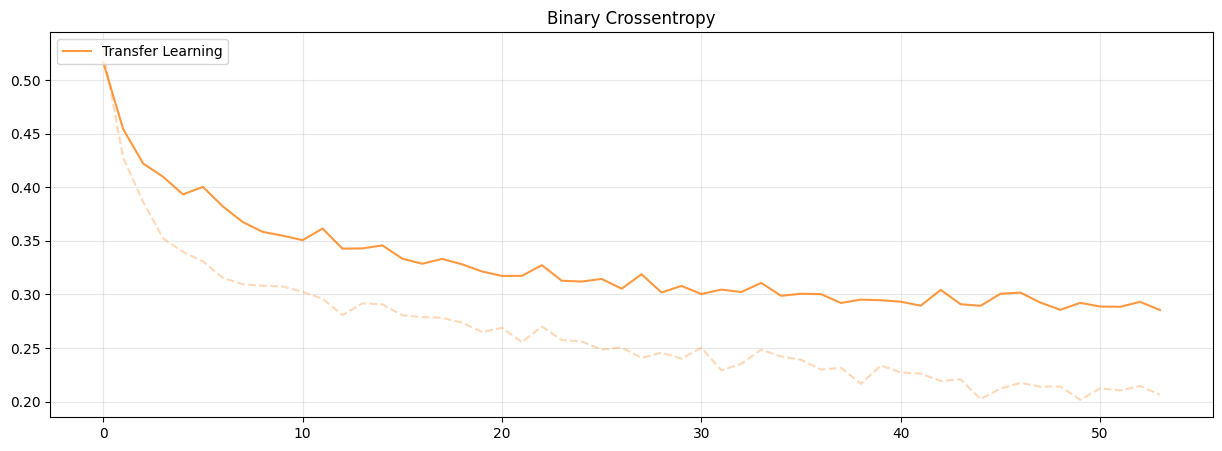

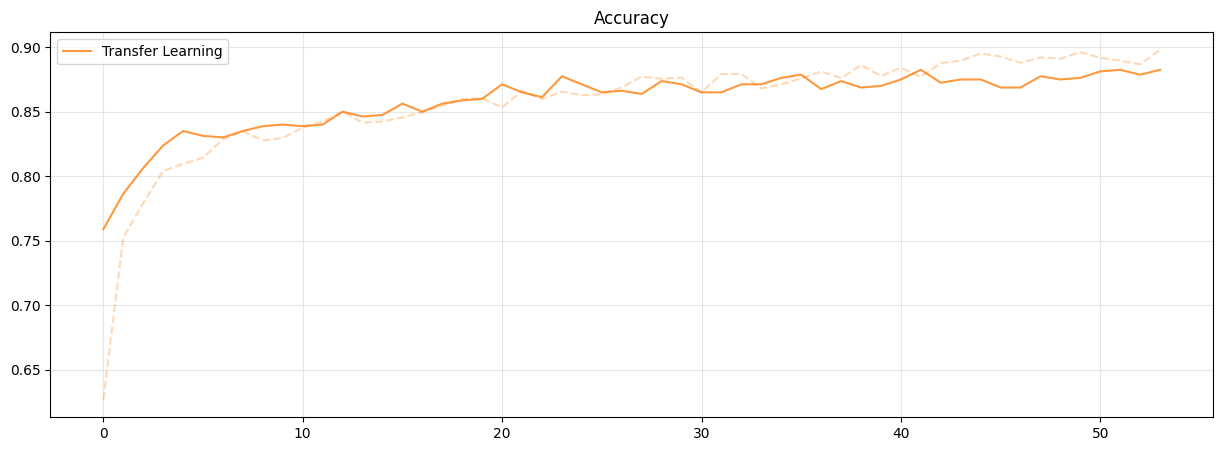

In [ ]:
# Plot the re-trained VGG16 training history
plt.figure(figsize=(15,5))
plt.plot(history['loss'], alpha=.3, color='#ff7f0e', linestyle='--')
plt.plot(history['val_loss'], label='Transfer Learning', alpha=.8, color='#ff7f0e')
plt.legend(loc='upper left')
plt.title('Binary Crossentropy')
plt.grid(alpha=.3)

plt.figure(figsize=(15,5))
plt.plot(history['accuracy'], alpha=.3, color='#ff7f0e', linestyle='--')
plt.plot(history['val_accuracy'], label='Transfer Learning', alpha=.8, color='#ff7f0e')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.grid(alpha=.3)

plt.show()

In [33]:
# Save the trained model
convnextlarge_model.save('convnextlarge_tl')
del convnextlarge_model

In [34]:
# Load the saved model
convnextlarge_model_ft = tfk.models.load_model('convnextlarge_tl')
convnextlarge_model_ft.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 preprocessing (Sequential)  (None, 96, 96, 3)         0         
                                                                 
 convnext_large (Functional  (None, 3, 3, 1536)        196230336 
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout_2 (Dropout)         (None, 1536)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               393472

In [35]:
# Set all ConvnextLarge layers as trainable
convnextlarge_model_ft.get_layer('convnext_large').trainable = True
#for i, layer in enumerate(convnextlarge_model_ft.get_layer('convnext_large').layers):
 #  print(i, layer.name, layer.trainable)

In [36]:
# Freeze first N layers, e.g., until the 133rd one
N = 252
for i, layer in enumerate(convnextlarge_model_ft.get_layer('convnext_large').layers[:N]):
  layer.trainable=False
for i, layer in enumerate(convnextlarge_model_ft.get_layer('convnext_large').layers):
   print(i, layer.name, layer.trainable)
convnextlarge_model_ft.summary()

0 input_1 False
1 convnext_large_prestem_normalization False
2 convnext_large_stem False
3 convnext_large_stage_0_block_0_depthwise_conv False
4 convnext_large_stage_0_block_0_layernorm False
5 convnext_large_stage_0_block_0_pointwise_conv_1 False
6 convnext_large_stage_0_block_0_gelu False
7 convnext_large_stage_0_block_0_pointwise_conv_2 False
8 convnext_large_stage_0_block_0_layer_scale False
9 convnext_large_stage_0_block_0_identity False
10 tf.__operators__.add False
11 convnext_large_stage_0_block_1_depthwise_conv False
12 convnext_large_stage_0_block_1_layernorm False
13 convnext_large_stage_0_block_1_pointwise_conv_1 False
14 convnext_large_stage_0_block_1_gelu False
15 convnext_large_stage_0_block_1_pointwise_conv_2 False
16 convnext_large_stage_0_block_1_layer_scale False
17 convnext_large_stage_0_block_1_identity False
18 tf.__operators__.add_1 False
19 convnext_large_stage_0_block_2_depthwise_conv False
20 convnext_large_stage_0_block_2_layernorm False
21 convnext_large_sta

In [38]:
# Compile the model
convnextlarge_model_ft.compile(loss=tfk.losses.BinaryCrossentropy(), optimizer=tfk.optimizers.AdamW(), metrics='accuracy')

In [39]:
# Fine-tune the model
ft_history = convnextlarge_model_ft.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    epochs = 200,
    class_weight = class_weight,
    validation_data = (X_val, y_val),
    callbacks = [early_stopping, lr_scheduler]
).history

Epoch 1/200
201/201 [==============================] - 95s 317ms/step - loss: 0.3687 - accuracy: 0.8076 - val_loss: 0.3861 - val_accuracy: 0.8315 - lr: 0.0010
Epoch 2/200
201/201 [==============================] - 46s 227ms/step - loss: 0.2928 - accuracy: 0.8370 - val_loss: 0.3551 - val_accuracy: 0.8414 - lr: 0.0010
Epoch 3/200
201/201 [==============================] - 43s 212ms/step - loss: 0.2560 - accuracy: 0.8691 - val_loss: 0.5136 - val_accuracy: 0.8589 - lr: 0.0010
Epoch 4/200
201/201 [==============================] - 47s 235ms/step - loss: 0.2207 - accuracy: 0.8901 - val_loss: 0.3231 - val_accuracy: 0.8702 - lr: 0.0010
Epoch 5/200
201/201 [==============================] - 47s 232ms/step - loss: 0.2213 - accuracy: 0.8854 - val_loss: 0.2651 - val_accuracy: 0.8826 - lr: 0.0010
Epoch 6/200
201/201 [==============================] - 46s 228ms/step - loss: 0.1948 - accuracy: 0.9088 - val_loss: 0.2863 - val_accuracy: 0.8789 - lr: 0.0010
Epoch 7/200
201/201 [=========================

In [40]:
# Save the model
convnextlarge_model_ft.save('convnextlarge_ft')
del convnextlarge_model_ft

In [41]:
# Re-load the model after fine tuning
convnextlarge_model_ft = tfk.models.load_model('convnextlarge_ft')
convnextlarge_model_ft.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 preprocessing (Sequential)  (None, 96, 96, 3)         0         
                                                                 
 convnext_large (Functional  (None, 3, 3, 1536)        196230336 
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout_2 (Dropout)         (None, 1536)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               393472

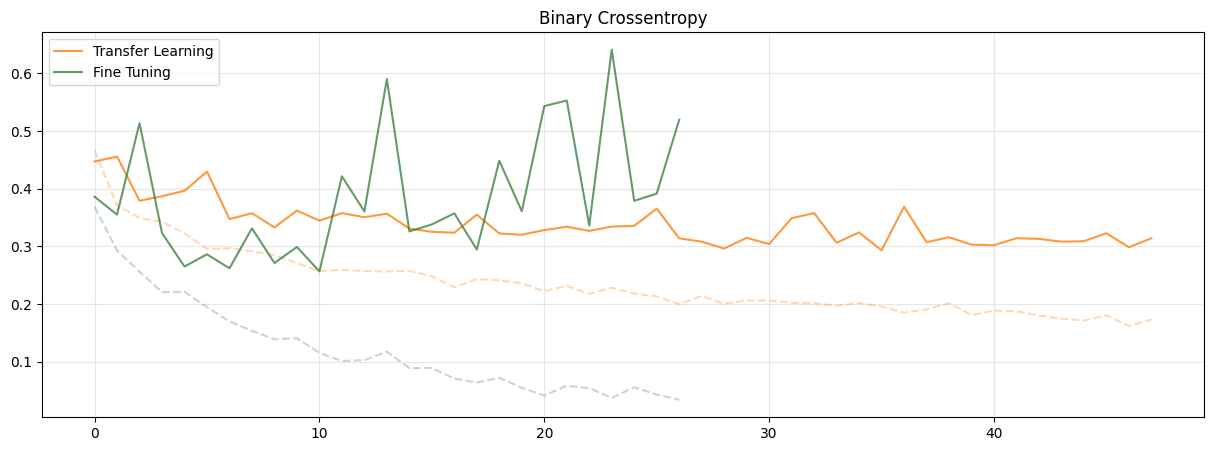

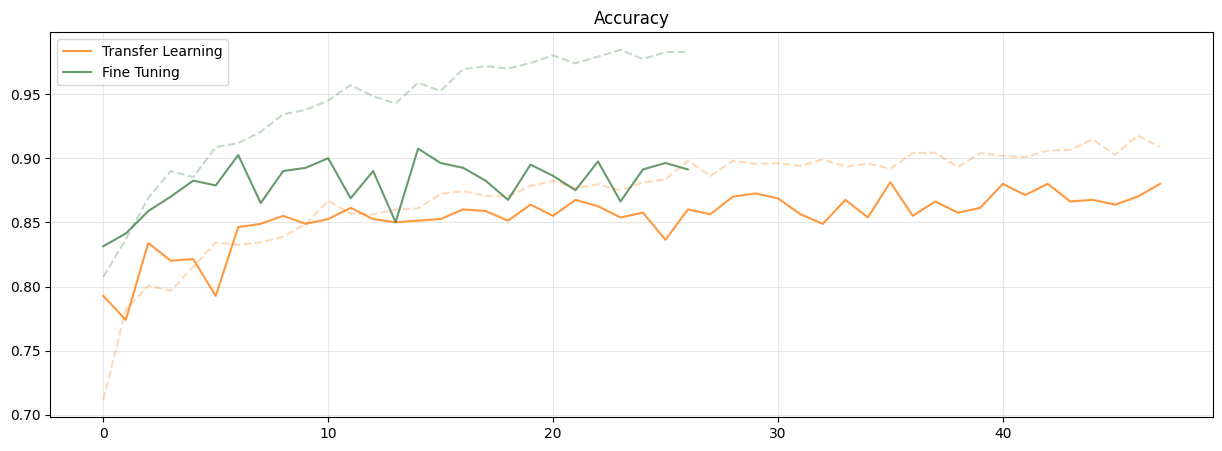

In [45]:
# Plot the EfficientNetB2 training history
plt.figure(figsize=(15,5))
plt.plot(history['loss'], alpha=.3, color='#ff7f0e', linestyle='--')
plt.plot(history['val_loss'], label='Transfer Learning', alpha=.8, color='#ff7f0e')
plt.plot(ft_history['loss'], alpha=.3, color='#3E8245', linestyle='--')
plt.plot(ft_history['val_loss'], label='Fine Tuning', alpha=.8, color='#3E8245')
plt.legend(loc='upper left')
plt.title('Binary Crossentropy')
plt.grid(alpha=.3)

plt.figure(figsize=(15,5))
plt.plot(history['accuracy'], alpha=.3, color='#ff7f0e', linestyle='--')
plt.plot(history['val_accuracy'], label='Transfer Learning', alpha=.8, color='#ff7f0e')
plt.plot(ft_history['accuracy'], alpha=.3, color='#3E8245', linestyle='--')
plt.plot(ft_history['val_accuracy'], label='Fine Tuning', alpha=.8, color='#3E8245')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.grid(alpha=.3)

plt.show()

In [43]:
# Predict labels for the entire test set
predictions = convnextlarge_model_ft.predict(X_test, verbose=0)

# Display the shape of the predictions
print("Predictions Shape:", predictions.shape)

Predictions Shape: (1001, 2)


Accuracy: 0.9071
Precision: 0.9013
Recall: 0.9017
F1: 0.9015


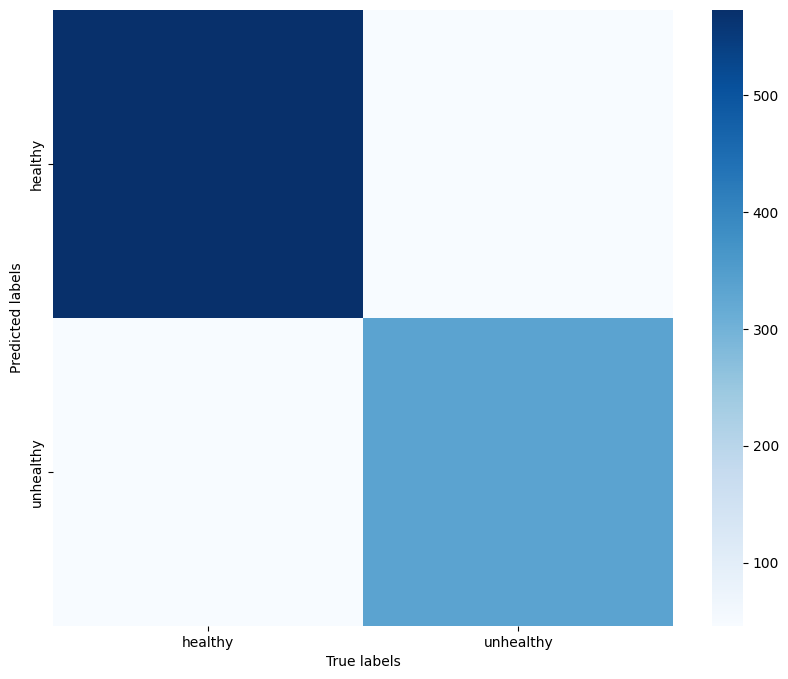

In [44]:
predicted_labels = np.argmax(predictions, axis=-1)
predicted_class_names = label_encoder.inverse_transform(predicted_labels)

# Compute the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))

# Compute classification metrics
accuracy = accuracy_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))
precision = precision_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
recall = recall_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
f1 = f1_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')

# Display the computed metrics
print('Accuracy:', accuracy.round(4))
print('Precision:', precision.round(4))
print('Recall:', recall.round(4))
print('F1:', f1.round(4))

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm.T, xticklabels=list(label_encoder.classes_), yticklabels=list(label_encoder.classes_), cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()